In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

In [61]:
bike=pd.read_csv("C:/Users/jangd/OneDrive/사진/문서/GitHub/git_hub_0420/python/ml/data_sets/train_bike.csv")

In [62]:
warnings.filterwarnings("ignore",category= RuntimeWarning)

print(bike.shape)

(10886, 12)


In [63]:
bike.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [64]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [65]:
# 문자열을 datetime 타입으로 변경.
bike['datetime']=bike.datetime.apply(pd.to_datetime)

# datetime타입에서 년,월,일 시간 추출
bike['year']=bike.datetime.apply(lambda x: x.year)
bike['month']=bike.datetime.apply(lambda x : x.month)
bike['day']=bike.datetime.apply(lambda x : x.day)
bike['hour']=bike.datetime.apply(lambda x:x.hour)
bike.head(3)

drop_columns=['datetime','casual','registered']
bike.drop(drop_columns,axis=1,inplace=True)


In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# log값 변환 시 NaN등의 이슈로 log()가 아닌 log1p()를 이용하여 RMSLE 계산
# log1p = log(1+x)
def rmsle(y,pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error()를 이용하여 rmse 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MAE, RMSE,RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val= rmsle(y,pred)
    rmse_val=rmse(y,pred)
    # MAE는 scikit learn의 mean_absolute_error()로 계산
    mae_val= mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE:{1:.3f}, MAE: {2:.3F}'.format(rmsle_val,rmse_val,mae_val))
    

In [67]:
# 학습데이터, 테스트 데이터 분리
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

y_target=bike['count']
X_features= bike.drop(['count'],axis=1,inplace=False)

X_train,X_test,y_train,y_test= train_test_split(X_features,y_target,test_size=0.3,random_state=0)


# 선형회귀 적용 후 학습/예측/평가
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 1.165, RMSE:140.900, MAE: 105.924


      real_count  predicted_count      diff
1221    1.098612              7.0  5.901388
2850    0.693147              6.0  5.306853
2536    0.693147              6.0  5.306853
2733    0.693147              6.0  5.306853
1974    0.693147              6.0  5.306853


<AxesSubplot:>

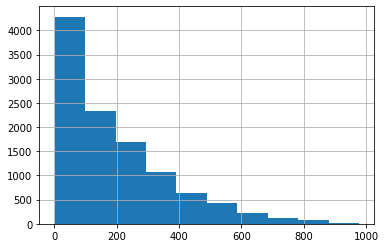

In [102]:
def get_top_error_data(y_test,pred,n_tops=5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교할 수 있도록 생성.
    result_df=pd.DataFrame(y_test.values,columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])
    # 예측값과 실제 값이 가장 큰 데이터 순으로 출력,
    print(result_df.sort_values('diff',ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

y_target.hist()

In [73]:
# 타겟 컬럼인 count 값을 log1p로 log 변환
y_target_log=np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train,X_test,y_train,y_test= train_test_split(X_features,y_target_log,test_size=0.3,random_state=0)
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)

y_test_exp=np.expm1(y_test)
# 테스트 데이터 셋의 Target 값은 Log변환되었으므로 다시 expml를 이용하여 원래 scale로 변환
pred_exp=np.expm1(pred)


evaluate_regr(y_test_exp,pred_exp)


RMSLE: 1.017, RMSE:162.594, MAE: 109.286


<AxesSubplot:>

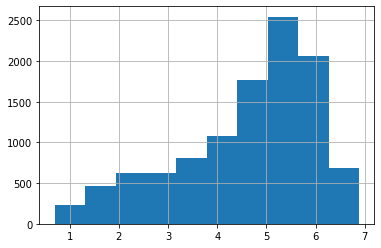

In [106]:
y_log_transform=np.log1p(y_target)
y_log_transform.hist()


<AxesSubplot:>

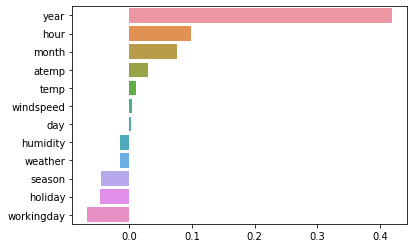

In [74]:
coef=pd.Series(lr_reg.coef_,index=X_features.columns)
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [97]:
# 'year','month','hour','season','weather' feature들을  One Hot Encoding
X_features_ohe=pd.get_dummies(X_features,columns=['year','month','hour','holiday',
                                                  'workingday','season','weather'])

X_features_ohe

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,19,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,19,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,19,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,19,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [100]:
# 원핫인코딩이 적용된  feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train,X_test,y_train,y_test=train_test_split(X_features_ohe,y_target_log,test_size=0.3,random_state=1)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model,X_train,X_test,y_train,y_test,is_expml=False):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    if is_expml:
        y_test=np.expm1(y_test)
        pred=np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)
# end of function get_model_predict

# model  별로 평가 수행
lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=10)
lasso_reg=Lasso(alpha=0.01)

for model in (lr_reg,ridge_reg,lasso_reg):
    get_model_predict(model,X_train,X_test,y_train,y_test,is_expml=True)

### LinearRegression ###
RMSLE: 0.583, RMSE:95.515, MAE: 62.686
### Ridge ###
RMSLE: 0.585, RMSE:96.552, MAE: 63.369
### Lasso ###
RMSLE: 0.636, RMSE:112.394, MAE: 72.944


<AxesSubplot:>

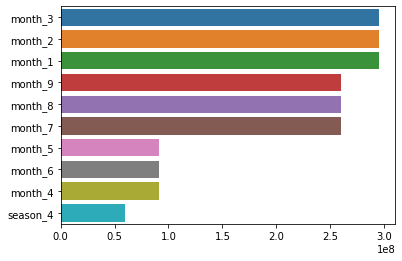

In [101]:
coef=pd.Series(lr_reg.coef_,index=X_features_ohe.columns)
coef_sort=coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values,y=coef_sort.index)
